In [35]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from scipy.optimize import minimize
from scipy import optimize

In [37]:
decimation_data_comercial = pd.read_csv("Decimation_Comercial.csv")
#decimation_data_mmi = pd.read_csv("Decimation_mmi.csv")

pti_inversion_comercial = pd.read_csv("PTI_Inversion_Comercial.csv")
#pti_inversion_comercial = pd.read_csv("PTI_Inversion_MMI.csv")

# DC Values

## Comercial Coupler

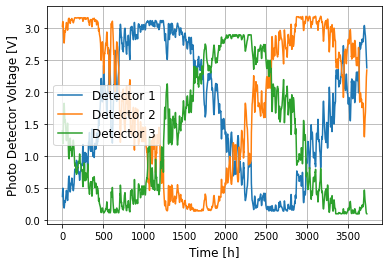

In [38]:
time = np.arange(len(decimation_data_comercial["DC CH1"]))
for channel in range(1, 4):
    plt.plot(time, decimation_data_comercial[f"DC CH{channel}"], label=f"Detector {channel}")
plt.xlabel("Time [h]", fontsize=12)
plt.ylabel("Photo Detector Voltage [V]", fontsize=12)
plt.grid()
plt.legend(fontsize=12)
plt.show()

## MMI Coupler

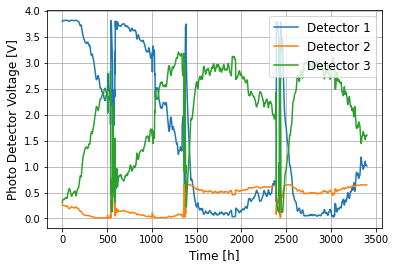

In [39]:
time = np.arange(len(decimation_data_mmi["DC CH1"]))
for channel in range(1, 4):
    plt.plot(time, decimation_data_mmi[f"DC CH{channel}"], label=f"Detector {channel}")
plt.xlabel("Time [h]", fontsize=12)
plt.ylabel("Photo Detector Voltage [V]", fontsize=12)
plt.grid()
plt.legend(fontsize=12)
plt.show()

# RMS Values

## Comercial Coupler

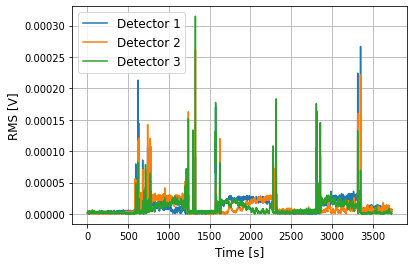

In [41]:
time = np.arange(len(decimation_data_comercial["AC CH1"]))
for channel in range(1, 4):
    plt.plot(time, decimation_data_comercial[f"AC CH{channel}"], label=f"Detector {channel}")
plt.xlabel("Time [s]", fontsize=12)
plt.ylabel("RMS [V]", fontsize=12)
plt.grid()
plt.legend(fontsize=12)
plt.show()

## MMI Coupler

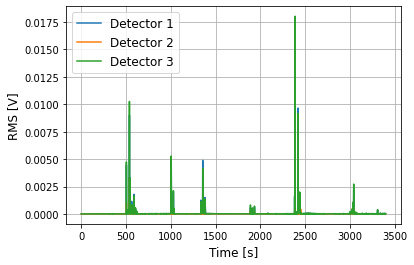

In [42]:
time = np.arange(len(decimation_data_mmi["RMS CH1"]))
for channel in range(1, 4):
    plt.plot(time, decimation_data_mmi[f"RMS CH{channel}"] * 10, label=f"Detector {channel}")
plt.xlabel("Time [s]", fontsize=12)
plt.ylabel("RMS [V]", fontsize=12)
plt.grid()
plt.legend(fontsize=12)
plt.show()

# Response Phases

## Comercial Coupler

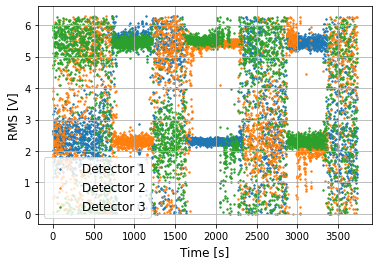

In [43]:
time = np.arange(len(decimation_data_comercial["Response Phase CH1"]))
for channel in range(1, 4):
    data = decimation_data_comercial[f"Response Phase CH{channel}"].to_numpy()
    data[decimation_data_comercial[f"Response Phase CH{channel}"] < 0] += 2 * np.pi
    plt.scatter(time, data, label=f"Detector {channel}", s=2)
plt.xlabel("Time [s]", fontsize=12)
plt.ylabel("RMS [V]", fontsize=12)
plt.grid()
plt.legend(fontsize=12)
plt.show()

In [44]:
response_phase_comercial = []
for channel in range(1, 4):
    data = decimation_data_comercial[f"Response Phase CH{channel}"].to_numpy()
    data[decimation_data_comercial[f"Response Phase CH{channel}"] < 0] += 2 * np.pi
    response_phase_comercial.append(np.mean(data[750:1000]))
response_phase_comercial = np.array(response_phase_comercial)
response_phase_comercial

array([5.41991185, 2.3311673 , 5.26887553])

In [45]:
response_phase_comercial[1] += np.pi
response_phase_comercial

array([5.41991185, 5.47275996, 5.26887553])

## MMI Coupler

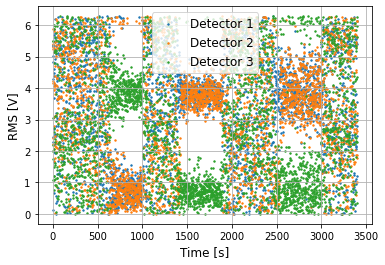

In [46]:
time = np.arange(len(decimation_data_mmi["Response Phase CH1"]))
for channel in range(1, 4):
    data = decimation_data_mmi[f"Response Phase CH{channel}"].to_numpy()
    data[decimation_data_mmi[f"Response Phase CH{channel}"] < 0] += 2 * np.pi
    plt.scatter(time, data, label=f"Detector {channel}", s=2)
plt.xlabel("Time [s]", fontsize=12)
plt.ylabel("RMS [V]", fontsize=12)
plt.grid()
plt.legend(fontsize=12)
plt.show()

In [47]:
response_phase_mmi = []
for channel in range(1, 4):
    data = decimation_data_mmi[f"Response Phase CH{channel}"].to_numpy()
    data[decimation_data_mmi[f"Response Phase CH{channel}"] < 0] += 2 * np.pi
    response_phase_mmi.append(np.mean(data[1500:1700]))
response_phase_mmi = np.array(response_phase_mmi)
response_phase_mmi

array([3.85469237, 3.79878346, 0.72470109])

In [48]:
response_phase_mmi = np.array(response_phase_mmi)
response_phase_mmi[2] += np.pi
response_phase_mmi

array([3.85469237, 3.79878346, 3.86629375])

# Interferometric Phase

## Comercial Coupler

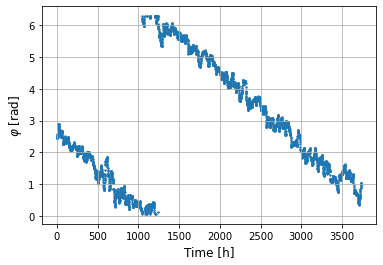

In [49]:
phases_comercial = pti_inversion_comercial["Interferometric Phase"]
plt.scatter(range(len(phases_comercial)), phases_comercial, label="Interferometrio Phase", s=2)
plt.xlabel("Time [h]", fontsize=12)
plt.ylabel(r"$\varphi$ [rad]", fontsize=12)
plt.grid()
plt.show()

## MMI Coupler

In [50]:
phases_mmi = pti_inversion_mmi["Interferometric Phase"]
plt.scatter(range(len(phases_mmi)), phases_mmi, label="Interferometrio Phase", s=2)
plt.xlabel("Time [h]", fontsize=12)
plt.ylabel(r"$\varphi$ [rad]", fontsize=12)
plt.grid()
plt.show()

NameError: name 'pti_inversion_mmi' is not defined

# PTI

## Comercial Coupler

In [51]:
pti_comercial = pti_inversion_comercial["PTI Signal"]
pti_mean_comercial = np.mean(np.array(pti_comercial).reshape(-1, 8), axis=1)
time_mean_comercial = np.arange(pti_mean_comercial.size)
time_mean_comercial *= 8

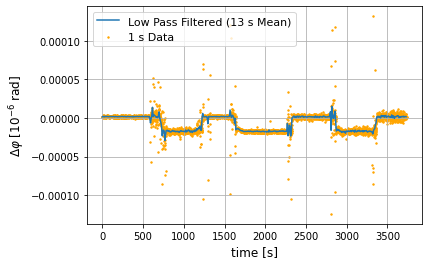

In [53]:
plt.plot(time_mean_comercial, -pti_mean_comercial, label="Low Pass Filtered (13 s Mean)")
plt.scatter(range(len(pti_comercial)), -pti_comercial, color="orange", s=2, label="1 s Data")
plt.grid()
plt.xlabel("time [s]", fontsize=12)
plt.ylabel(r"$\Delta\varphi$ [$10^{-6}$ rad]", fontsize=12)
plt.legend(fontsize=11)
plt.show()

In [ ]:
plt.plot(time_mean, -10 * pti_mean_mmi, label="Low Pass Filtered (13 s Mean)")
plt.scatter(range(len(pti_mmi)), -10 * pti_mmi, color="orange", s=2, label="1 s Data")
plt.grid()
#plt.axis([0, len(pti_mmi), -50, 50])
plt.xlabel("time [s]", fontsize=12)
plt.ylabel(r"$\Delta\varphi$ [$10^{-6}$ rad]", fontsize=12)
plt.legend(fontsize=11)
plt.show()

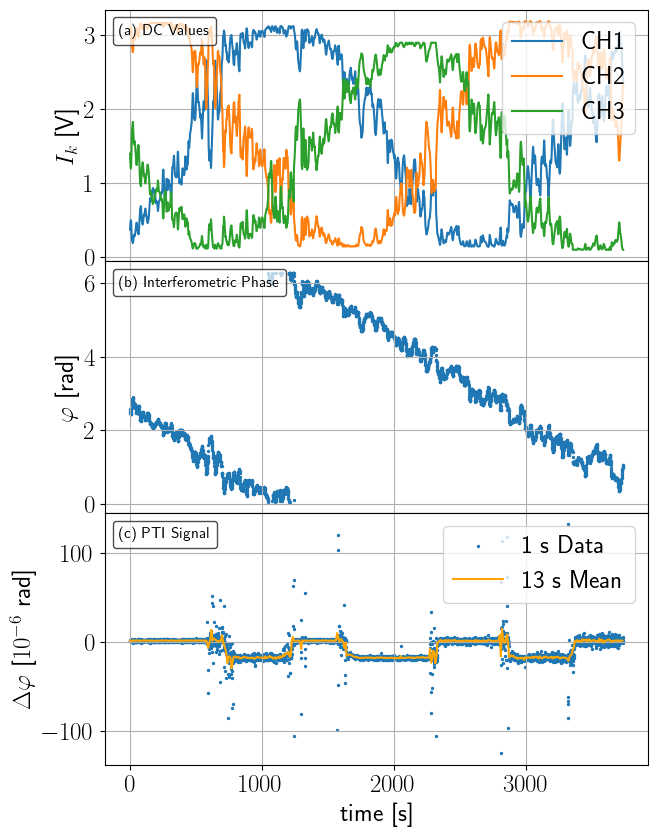

In [76]:
%matplotlib inline
plt.rcParams['text.usetex'] = True
plt.rcParams['font.size'] = 18
from matplotlib.offsetbox import AnchoredText

t = range(len(pti_comercial))

fig=plt.figure(figsize=(7, 10), dpi=100)
ax1 = plt.subplot(311)
ax2 = plt.subplot(312)
ax4 = plt.subplot(313)


ax1.plot(t, decimation_data_comercial["DC CH1"], label="CH1")
ax1.plot(t, decimation_data_comercial["DC CH2"], label= "CH2")
ax1.plot(t, decimation_data_comercial["DC CH3"], label="CH3")

ax2.scatter(t, phases_comercial, s=2)


ax4.scatter(t, -pti_comercial * 1e6, s=2, label="1 s Data")
ax4.plot(time_mean_comercial, -pti_mean_comercial * 1e6, "orange", label="13 s Mean")

at1 = AnchoredText("(a) DC Values", prop=dict(size=11), frameon=True, loc='upper left')
at2 = AnchoredText("(b) Interferometric Phase", prop=dict(size=11), frameon=True, loc='upper left')
at4 = AnchoredText("(c) PTI Signal", prop=dict(size=11), frameon=True, loc='upper left')

at1.patch.set(alpha=0.7)
at1.patch.set_boxstyle('round, pad=0, rounding_size=0.2')
at2.patch.set(alpha=0.7)
at2.patch.set_boxstyle('round, pad=0, rounding_size=0.2')
at4.patch.set(alpha=0.7)
at4.patch.set_boxstyle('round, pad=0, rounding_size=0.2')

ax1.get_shared_x_axes().join(ax1, ax2, ax4)
ax1.set_xticklabels([])
ax1.grid()
ax1.set_ylabel(r"$I_k$ [V]")
ax1.legend(loc="upper right")
ax1.add_artist(at1)

ax2.set_xticklabels([])
ax2.grid()
ax2.set_ylabel(r"$\varphi$ [rad]")
ax2.add_artist(at2)

ax4.grid()
ax4.set_xlabel("time [s]")
ax4.set_ylabel(r"$\Delta \varphi$ [$10^{-6}$ rad]")
ax4.legend(loc="upper right")
ax4.add_artist(at4)

plt.subplots_adjust(hspace=.0)

ax2.autoscale()
ax4.autoscale()
plt.savefig(fname="comercial.pdf", dpi=400, bbox_inches='tight')

In [61]:
%matplotlib tk
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.offsetbox import AnchoredText

t = np.arange(len(pti_mmi))

fig=plt.figure(figsize=(7, 10), dpi=100)
ax1 = plt.subplot(411)
ax2 = plt.subplot(412)
ax3 = plt.subplot(413)
ax4 = plt.subplot(414)


ax1.plot(t, decimation_data_mmi["DC CH1"], label="CH1")
ax1.plot(t, decimation_data_mmi["DC CH2"], label= "CH2")
ax1.plot(t, decimation_data_mmi["DC CH3"], label="CH3")

ax2.scatter(t, phases_mmi_coupler, s=2)

ax3.scatter(t, decimation_data_mmi[f"Response Phase CH1"], label="CH1", s=2)
ax3.scatter(t, decimation_data_mmi[f"Response Phase CH2"], label="CH2", s=2)
ax3.scatter(t, decimation_data_mmi[f"Response Phase CH3"], label="CH3", s=2)

ax4.scatter(t, -10 * pti_mmi, s=2, label="1 s Data")
ax4.plot(time_mean, -10 * pti_mean_mmi, "orange", label="13 s Mean")

at1 = AnchoredText("(a) DC Values", prop=dict(size=11), frameon=True, loc='upper left')
at2 = AnchoredText("(b) Interferometric Phase", prop=dict(size=11), frameon=True, loc='upper left')
at4 = AnchoredText("(c) PTI Signal", prop=dict(size=11), frameon=True, loc='upper left')

at1.patch.set(alpha=0.7)
at1.patch.set_boxstyle('round, pad=0, rounding_size=0.2')
at2.patch.set(alpha=0.7)
at2.patch.set_boxstyle('round, pad=0, rounding_size=0.2')

at4.patch.set(alpha=0.7)
at4.patch.set_boxstyle('round, pad=0, rounding_size=0.2')

ax1.get_shared_x_axes().join(ax1, ax2, ax3, ax4)
ax1.set_xticklabels([])
ax1.grid()
ax1.set_ylabel(r"$I_k$ [V]")
ax1.legend(loc="upper right")
ax1.add_artist(at1)

ax2.set_xticklabels([])
ax2.grid()
ax2.set_ylabel(r"$\varphi$ [rad]")
ax2.add_artist(at2)

ax4.grid()
ax4.set_xlabel("time [s]")
ax4.set_ylabel(r"$\Delta \varphi$ [$10^{-6}$ rad]")
ax4.legend(loc="upper right")
ax4.add_artist(at4)
ax4.set_ylim(0, 1)

plt.subplots_adjust(hspace=.0)

ax2.autoscale()
ax4.autoscale()
plt.savefig(fname="mmi.pdf", dpi=400, bbox_inches='tight')

NameError: name 'pti_mmi' is not defined

 # Output Phases

## Comercial Coupler

In [ ]:
plt.hist(output_phase_1_comercial_coupler, bins="auto", color="#a2d1e5")
plt.xlabel("Output Phase [rad]", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.title(f"Mean: {np.round(np.mean(output_phase_1_comercial_coupler), 2)} rad,"
          f" Std: {np.round(np.std(output_phase_1_comercial_coupler), 2)} rad", fontsize=14)
plt.grid()
plt.show()

In [ ]:
plt.hist(output_phase_2_comercial_coupler, bins="auto", color="#a2d1e5")
plt.xlabel("Output Phase [rad]", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.grid()
plt.title(f"Mean: {np.round(np.mean(output_phase_2_comercial_coupler), 2)} rad,"
          f" Std: {np.round(np.std(output_phase_2_comercial_coupler), 2)} rad", fontsize=14)
plt.show()

## MMI Coupler

In [ ]:
plt.hist(output_phase_1_mmi_coupler, bins="auto", color="#a2d1e5")
plt.xlabel("Output Phase [rad]", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.title(f"Mean: {np.round(np.mean(output_phase_1_mmi_coupler), 2)} rad,"
          f" Std: {np.round(np.std(output_phase_1_mmi_coupler), 2)} rad", fontsize=14)
plt.grid()
plt.show()

In [ ]:
plt.hist(output_phase_2_mmi_coupler, bins="auto", color="#a2d1e5")
plt.xlabel("Output Phase [rad]", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.title(f"Mean: {np.round(np.mean(output_phase_2_mmi_coupler), 2)} rad,"
          f" Std: {np.round(np.std(output_phase_2_mmi_coupler), 2)} rad", fontsize=14)
plt.grid()
plt.show()

In [ ]:
phase_scan = PhaseScan(stepsize=50, signals=)

